# ACR Phantom Distortion Using Grid

Distortion and scale factors based on grid point positions with respect to the nominal grid geometry

## Distortion Measurements
### General Notes
There details in the [accreditation instructions](http://www.acr.org/~/media/ACR/Documents/Accreditation/MRI/LargePhantomGuidance.pdf).

This is the ACR *Large* phantom (190mm diameter, length 148mm) - filled with 10mM NiCl<sub>2</sub>, 75mM NaCl.

We could use a perfectly aligned template to remove small rotations and shifts. Gross errors
should be avoidable as there are unambiguous set up marks on the phantom. They seem to use multiple series (T<sub>1</sub>W, T<sub>2</sub>W etc) with quite course slices (5mm + 3mm). They recommend twiddling the windowing
when making measurements - we can probably do this in a more principled way.

### Gradient Strength Calibration
For these they measure the size of the phantom so we'll want
 - Full slice coverage (or a non-axial view)
 - Sufficient BW in S/S and R/O to minimise B<sub>0</sub> effects on scale/distortion
 - Relatively easy to do with edge detection and peak location
 - In-plane they take the phantom diameters at 4 angles at the level of the distortion grid
 - Expect 190mm &oslash; by 140mm length, both &plusmn;2mm
 - NB gradient amplifier warm up effects (really? for solid state amps?)

## Analysis of Grid Pattern

In [1]:
from os.path import join
from mriqa.phantoms import ACRDIST
from mriqa.reports import acr_distortion_report
from dcmfetch import fetch_series

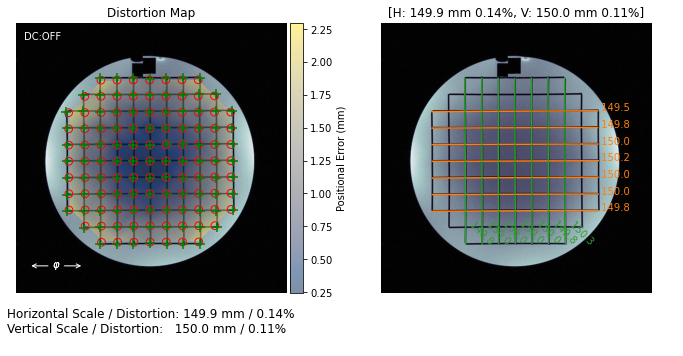

Protocol Orientation PhaseDirection  PixelBandwidth  \
Series                                                                       
10      SE_AXIAL_RL_ACR_SL2_512       Axial             RL           375.0   

        Sensitivity  HorizontalScale  HorizontalDistortion  VerticalScale  \
Series                                                                      
10         0.160491       149.902858              0.142316     149.973066   

        VerticalDistortion  
Series                      
10                0.106492

In [2]:
dobjs = fetch_series(patid='PQACRY20160411RHD', stuid='1', sernos=[10])
acr_distortion_report(dobjs[33])